## Exploratory data analysis for Titanic data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# tutorial/source: https://www.sharpsightlabs.com/blog/seaborn-barplot/

#### Step 1: Import data

In [2]:
# import data; print first and last 10 lines
df = pd.read_csv('train.csv', index_col = 0)
df.head(10)
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


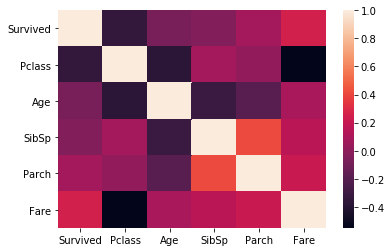

In [19]:
# Quick and dirty check for correlated columns

sns.heatmap(df.corr())

#### Step 2: Plot survival

I'm making a plot with one bar, because the outcome is binary (and adding redundant bars makes the plot harder to read).

In [3]:
# calculate survival rate and death rate
survival_rate = df['Survived'].mean() * 100 # convert to %
survival_rate

death_rate = 1 - survival_rate

##### Plot in Pandas

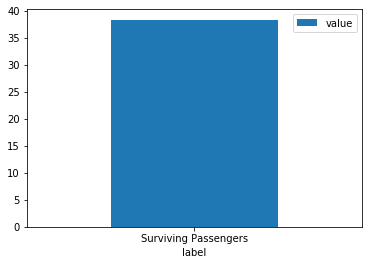

In [4]:
plot_data = pd.DataFrame({'label' : ['Surviving Passengers'], 'value': [survival_rate]})

plot_pd = plot_data.plot.bar(x = 'label', y = 'value', rot = 0)

##### Plot in Matplotlib

(0, 100)

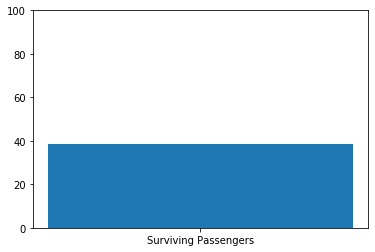

In [5]:
# plot in Matplotlib

bars = ['Surviving Passengers']
y_pos = np.arange(len(bars))

plt.bar(y_pos, survival_rate)
plt.xticks(y_pos, bars)
plt.ylim(0, 100)

##### Plot in Seaborn

[Text(0, 0.5, '%'), Text(0.5, 0, 'Surviving Passengers')]

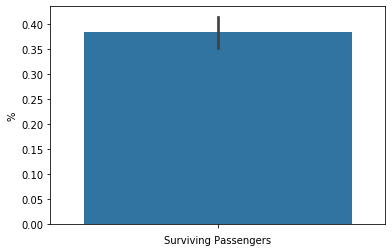

In [6]:
plot = sns.barplot(data = df, y = 'Survived')
plot.set(xlabel='Surviving Passengers', ylabel='%')

#### Step 3: How many of the 1st class passengers survived?

In [7]:
# create mini data set with just the first class passengers

total_first = df[df['Pclass'] == 1]

# now calculate the no. of survivors
first_surv = total_first['Survived'].mean()
first_surv

0.6296296296296297

#### Step 4: Bar plot with passenger class vs. gender survival rates

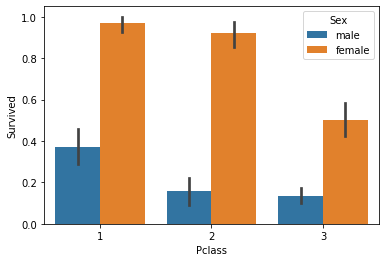

In [8]:
sns.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

#### Step 5: Age histogram

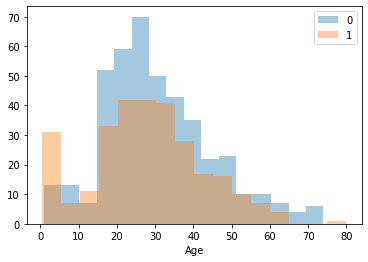

In [9]:
# seaborn distplot does not seem to support **kwarg hue... le sigh.
# solution adapted from here: https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

df_s = df[df.Survived == 0] # everyone who died. Must create new df, otherwise we overwrite the original and cause grief when trying to create 2nd plot
plot = sns.distplot(df_s['Age'],  kde=False, label = 0)

df_d = df[df.Survived == 1] # everyone who survived
plot = sns.distplot(df_d['Age'],  kde=False, label = 1)

labels = {0: 'did not survive', 1 : 'survived'}

plot.legend()
plot.legend(labels = labels)
# I do not understand why it is not showing 'did not survive'  and 'survived' as labels??

#### Step 6: Calculate average ages for surviving/non-surviving passengers

In [10]:
ages = df.groupby(['Survived']).mean()
ages['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

#### Step 7: Replace missing age values by mean age

In [11]:
# note: do not split by surviving/non-surviving passengers, just mean age overall

# calculate mean age.
mean_age = df['Age'].mean()
mean_age

# fill in NaNs
df2 = df['Age'].fillna(mean_age)

#### Step 8: Table of survivors

In [12]:
step8_survivors = df.groupby(['Pclass', 'Sex', 'Survived']).size()
# .size() counts all entries, not just NaN
step8_survivors

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

## Additional analysis: Ticket fares and survival

In [18]:
df.describe()

df.groupby(['Survived']).median()

# One outlier: fare of > £500

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,3,28.0,0,0,10.5
1,2,28.0,0,0,26.0


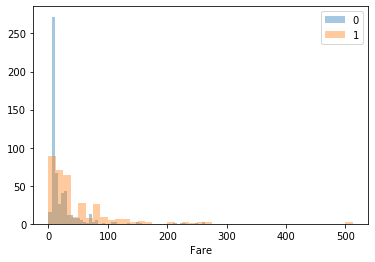

In [14]:
df_s_fare = df[df.Survived == 0] # everyone who died. Must create new df, otherwise we overwrite the original and cause grief when trying to create 2nd plot
plot = sns.distplot(df_s_fare['Fare'],  kde=False, label = 0)

df_d_fare = df[df.Survived == 1] # everyone who survived
plot = sns.distplot(df_d_fare['Fare'],  kde=False, label = 1)

labels = {0: 'did not survive', 1 : 'survived'}

plot.legend()
plot.legend(labels = labels)